# Jak analyzovat data pomocí pythonu

Základem všeho struktura jménem slovník. Když máme několik druhů, je dobré si ukládat data bokem do slovníku, aby se s snimi dalo různě pracovat. Pokud bychom tedy dělali analýzu délky nohou různých druhů, mohla by datová struktura vypadat asi takto:

In [ ]:
species = {} # vytvorime slovnik
species['canis_lupus'] = {} # vytvorime slovnik pro urcity druh
species['canis_lupus']['predni_prava'] = 20
species['canis_lupus']['zadni_prava'] = 30
species['canis_lupus']['predni_leva'] = 20
species['canis_lupus']['zadni_leva'] = 30

species['felix_normalis'] = {} # vytvorime slovnik pro urcity druh
species['felix_normalis']['predni_prava'] = 10
species['felix_normalis']['zadni_prava'] = 20
species['felix_normalis']['predni_leva'] = 10
species['felix_normalis']['zadni_leva'] = 20

species['bubo_bubo'] = {} # vytvorime slovnik pro urcity druh
species['bubo_bubo']['predni_prava'] = 100
species['bubo_bubo']['zadni_prava'] = 5
species['bubo_bubo']['predni_leva'] = 100
species['bubo_bubo']['zadni_leva'] = 5

Používám zde slovník ve slovníku, což může znít trochu kostrbatě, ale má to několik výhod. Jako první bych označil to, že si mohu pomocí pár příkazů uložit data do tzv. JSONu. To velmi usnadňuje práci s daty:

In [ ]:
import json

file_to_save = 'kam_se_ma_ulozit.json'

with open(file_to_save, 'w') as fp:
    json.dump(species, fp)

Načtení ja také otázka chvilky:

In [ ]:
import json

file_to_load = 'kde_je_ulozen.json'

with open(file_to_load) as file:
    data = json.load(file)

Když už jsou takhle data připravená, tak lze z nich zjistit pár dalších věcí. Třeba jaké druhy máme ve slovníku? Vzhledem k tomu, že názvy druhů používame jako klíče, můžeme se zeptat slovníku, jaké má klíče a ...

In [19]:
species.keys()

dict_keys(['canis_lupus', 'felix_normalis', 'bubo_bubo'])

víme, jaké druhy můžeme analyzovat.

Můžeme dělat také takové běžné operace jako průměr nebo součet všech adekvátních délek. Tam je jen důležité si dávat pozor, aby jsme nemíchali "jablka s hruškama"

In [20]:
import statistics # konecne delame statistiku!

co_nas_zajima = 'predni_prava'

values_of_interest = [] # hodonoty si budeme ukladat bokem do pole

for species_key in species.keys():
    species_data = species[species_key]
    values_of_interest.append(species_data[co_nas_zajima])
        
print('prumerna delka prednich pravych nohou je: ' + str(statistics.mean(values_of_interest))) # fakt je nutne kvuli jedne funkci importovat cely modul?!

prumerna delka prednich pravych nohou je: 43.333333333333336


Můžeme taky taková data zobrazit v grafu. K tomu je nejlepší knihovna Matplotlib. Má velké množství grafů a pokud jste si zvykli na definci grafů z Matlabu, budete jako doma.

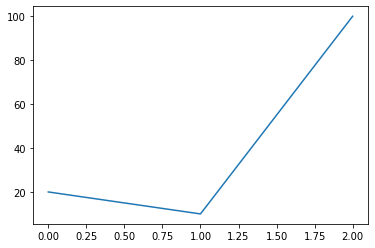

In [21]:
%matplotlib inline 
# chceme zobrazit grafy primo v jupyteru
import matplotlib.pyplot as plt # import knihovny

plt.plot(values_of_interest) # zobrazi line chart, idealni na "vhled" do dat... 

Pokud chceme zobrazit více dat v jednom grafu, není to překážkou, jen to je trochu složitější. V podstatě si bokem uložíme seznam druhů a k nim přiřadíme indexy. Následně si v jednom cyklu vytáhneme data ze slovníku tak, aby jsme je mohli postupně dávat do grafů:

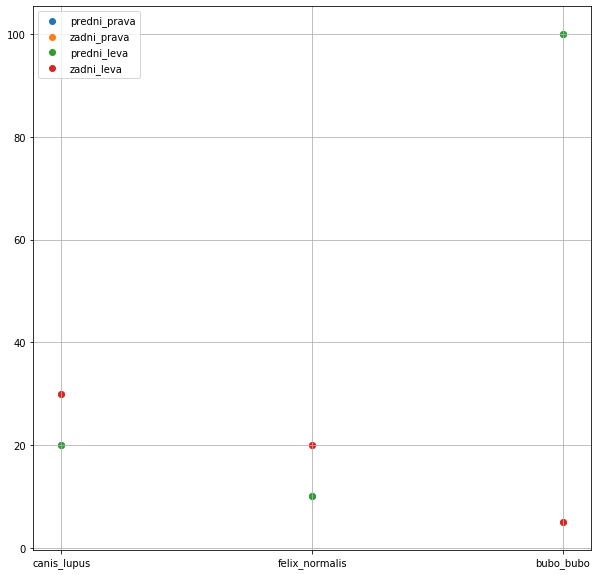

In [32]:
figure = plt.figure(figsize = (10, 10)) 
ax1 = figure.add_subplot(111)

lengths_of_interest = ['predni_prava', 'zadni_prava', 'predni_leva', 'zadni_leva']
lengths = {}

for length_key in lengths_of_interest:
    lengths[length_key] = [] # priprava struktury pro graf

for species_key in species.keys():
    species_data = species[species_key]
    for length_key in lengths_of_interest:
        lengths[length_key].append(species_data[length_key]) # figl z pripravy dat, jen s rozsirenim o na druhy a jedntlive delky...

species_range = range(len(species)) # metoda range definuje rozsah, tj. range(5) vytvori pole [0,1,2,3,4]. Ja do ni vkladam velikost slovniku s druhy.

plt.xticks(species_range, list(species.keys())) # menime popisky z cisel na slova... 

for length_key in lengths_of_interest:
    plt.scatter(species_range, lengths[length_key], label = length_key) # pridavame jednotlive podgrafy... 

plt.legend() # pridame legendu
plt.grid() # a mrizku

Graf vypadá poněkud divně, že? Vlastně ne... Když se podíváte na data, tak zjistíme, že je vlastně správně ;) 